#### Importing Libraries

In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split

from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score

from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing 
label = preprocessing.LabelEncoder()

In [2]:
df = pd.read_csv("Stars.csv")
df.head()

,Temperature,L,R,A_M,Color,Spectral_Class,Type
0,3068,0.002400,0.1700,16.12,Red,M,0
1,3042,0.000500,0.1542,16.60,Red,M,0
2,2600,0.000300,0.1020,18.70,Red,M,0
3,2800,0.000200,0.1600,16.65,Red,M,0
4,1939,0.000138,0.1030,20.06,Red,M,0


#### Data-Description  
Temperature -- K  
L -- L/Lo  
R -- R/Ro  
AM -- Mv  
Color -- General Color of Spectrum

#### Target:  
Type  
from 0 to 5    
Red Dwarf - 0  
Brown Dwarf - 1  
White Dwarf - 2  
Main Sequence - 3  
Super Giants - 4  
Hyper Giants - 5  

#### Math:  
Lo = 3.828 x 10^26 Watts  
(Avg Luminosity of Sun)  
Ro = 6.9551 x 10^8 m  
(Avg Radius of Sun)  

In [3]:
df.dtypes

Temperature         int64
L                 float64
R                 float64
A_M               float64
Color              object
Spectral_Class     object
Type                int64
dtype: object

In [4]:
df['Type'].value_counts()

0    40
1    40
2    40
3    40
4    40
5    40
Name: Type, dtype: int64

In [5]:
 df.isnull().any()

Temperature       False
L                 False
R                 False
A_M               False
Color             False
Spectral_Class    False
Type              False
dtype: bool

In [6]:
df['Color']= label.fit_transform(df['Color'])
df['Spectral_Class']= label.fit_transform(df['Spectral_Class']) 

print(df['Color'].unique())
print(df['Spectral_Class'].unique())

[ 8  1  9 13  2  7  0  4 11 15  5 10 14 16 12  6  3]
[5 1 0 2 6 4 3]


In [7]:
X = df.drop(['Type'],axis=1)
y = df['Type']

### Cor-realtion Matrix

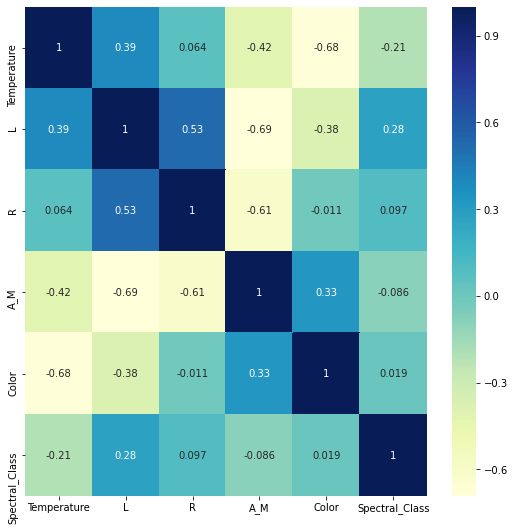

In [16]:
fig= plt.figure(figsize=(9,9))
sns.heatmap(X.corr(), annot=True,cmap="YlGnBu")
fig.savefig('Visualize/Correlation.png')

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(180, 6)
(180,)
(60, 6)
(60,)


In [12]:
model1 = RandomForestClassifier(n_estimators=100,random_state=0).fit(X_train, y_train)
RF_pred = model1.predict(X_test)
print('the accuracy',accuracy_score(y_test, RF_pred))

the accuracy 1.0


In [13]:
cm = confusion_matrix(y_test, RF_pred)
print(cm)

[[ 9  0  0  0  0  0]
 [ 0  9  0  0  0  0]
 [ 0  0 10  0  0  0]
 [ 0  0  0 14  0  0]
 [ 0  0  0  0  6  0]
 [ 0  0  0  0  0 12]]


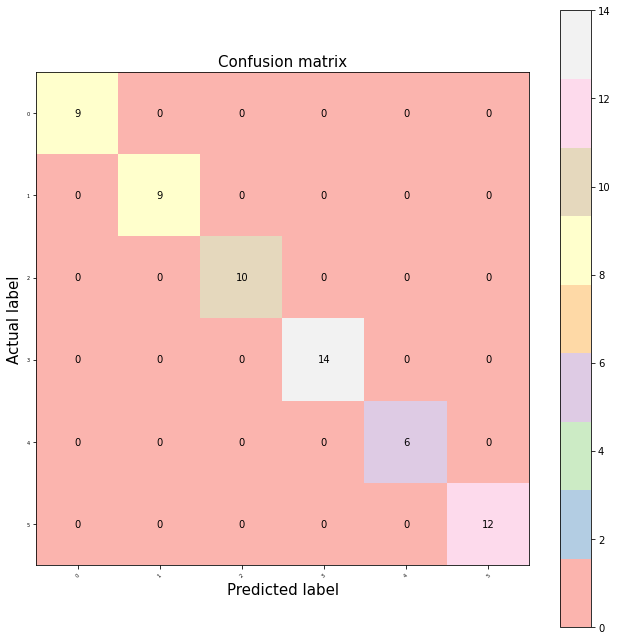

In [17]:
plt.figure(figsize=(9,9))
plt.imshow(cm, interpolation='nearest', cmap='Pastel1')
plt.title('Confusion matrix', size = 15)
plt.colorbar()
tick_marks = np.arange(6)
plt.xticks(tick_marks, ["0", "1", "2", "3", "4", "5"], rotation=45, size = 5)
plt.yticks(tick_marks, ["0", "1", "2", "3", "4", "5"], size = 5)
plt.tight_layout()
plt.ylabel('Actual label', size = 15)
plt.xlabel('Predicted label', size = 15)
width, height = cm.shape

for x in range(width):
    for y in range(height):
        plt.annotate(str(cm[x][y]), xy=(y, x), 
                    horizontalalignment='center',
                    verticalalignment='center')
plt.savefig('Visualize\RF.png')

In [18]:
DT_clf = DecisionTreeClassifier(random_state=0)
DT_clf.fit(X_train, y_train)
DT_pred=DT_clf.predict(X_test)
print('the accuracy',accuracy_score(y_test,DT_pred))

the accuracy 1.0


In [19]:
cm = confusion_matrix(y_test, DT_pred)
print(cm)

[[ 9  0  0  0  0  0]
 [ 0  9  0  0  0  0]
 [ 0  0 10  0  0  0]
 [ 0  0  0 14  0  0]
 [ 0  0  0  0  6  0]
 [ 0  0  0  0  0 12]]


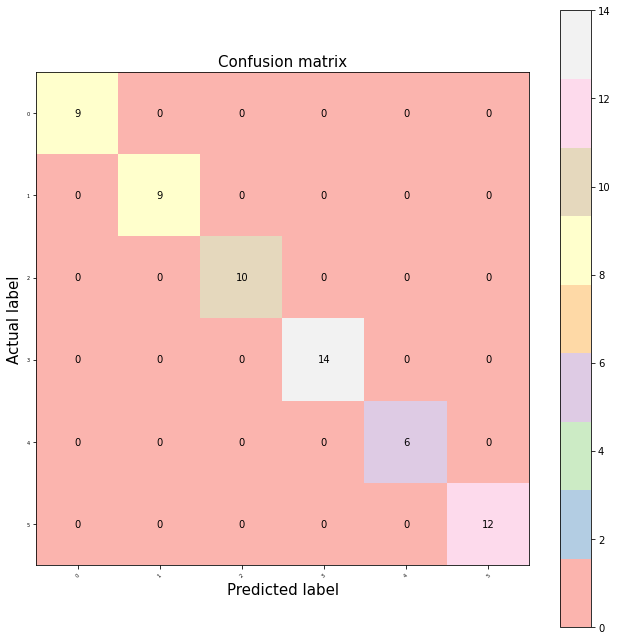

In [20]:
plt.figure(figsize=(9,9))
plt.imshow(cm, interpolation='nearest', cmap='Pastel1')
plt.title('Confusion matrix', size = 15)
plt.colorbar()
tick_marks = np.arange(6)
plt.xticks(tick_marks, ["0", "1", "2", "3", "4", "5"], rotation=45, size = 5)
plt.yticks(tick_marks, ["0", "1", "2", "3", "4", "5"], size = 5)
plt.tight_layout()
plt.ylabel('Actual label', size = 15)
plt.xlabel('Predicted label', size = 15)
width, height = cm.shape

for x in range(width):
    for y in range(height):
        plt.annotate(str(cm[x][y]), xy=(y, x), 
                    horizontalalignment='center',
                    verticalalignment='center')
plt.savefig('Visualize\DT.png')